In [106]:
import numpy as np
from scipy.sparse import rand as sprand
import torch
from torch.autograd import Variable
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
avg_temp = np.array([
    [-5.8, -3.1, 4.5, 6.7, 14.3, 18.2, 20.1, 20.6, 15.9, 11.2, 3.6, -7.2],
    [-2.9, 3.6, 4.2, 9.7, 16.1, 19.5, 20.0, 18.8, 16.4, 7.6, 3.2, 1.3],
    [0.3, 1.5, 5.9, 8.4, 14.8, 20.2, 24.5, 24.7, 19.7, 13.0, 7.9, 1.9],
    [2.3, 6.5, 8.7, 9.2, 12.3, 15.4, 17.3, 20.0, 14.8, 10.8, 8.7, 6.4],
    [11.5, 13.9, 14.3, 15.7, 16.3, 17.4, 17.2, 17.7, 18.2, 17.4, 14.6, 10.4],
    [9.7, 10.3, 12.7, 15.5, 21.2, 22.1, 24.1, 25.3, 23.5, 20.1, 15.7, 11.8],
    [14.0, 15.6, 17.5, 20.3, 20.6, 18.1, 17.6, 18.2, 17.8, 16.8, 14.9, 16.0],
    [23.1, 23.3, 21.4, 19.0, 17.1, 15.5, 15.4, 15.6, 15.4, 18.6, 20.9, 21.3],
    [23.8, 24.6, 23.4, 20.8, 18.1, 15.1, 14.4, 14.5, 17.3, 19.0, 21.8, 24.3]
])

In [81]:
data = torch.Tensor(avg_temp)

In [82]:
data.shape[1]

12

In [108]:
class MatrixFactorization(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.var=torch.nn.Parameter(data)
        self.user_factors = torch.nn.Embedding(data.shape[0],1)
        self.item_factors = torch.nn.Embedding(data.shape[1],1)
    def forward(self, user,item):
        return self.user_factors(user) * self.item_factors(item)

In [134]:
model = MatrixFactorization()
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6) # learning rate

In [135]:
model

MatrixFactorization(
  (user_factors): Embedding(9, 1)
  (item_factors): Embedding(12, 1)
)

In [136]:
#r = torch.LongTensor(r)
#rows = data
#r = np.random.permutation(data.shape[0])
r = np.random.permutation(np.array(range(data.shape[0])))
#c = np.random.permutation(data.shape[1])
c = np.random.permutation(np.array(range(data.shape[1])))
#u = [torch.LongTensor([np.long(k)])for k in r]
#i = [torch.LongTensor([np.long(j)])for j in c]
#len(c)
#np.array(range(10))

In [137]:
loss2=[]
avg_loss=[]
for i in range(1500):
    for k in range(data.shape[0]):
        for j in range(data.shape[1]):
            rating = Variable(torch.FloatTensor([[data[k][j]]]))
            u = torch.LongTensor([np.long(r[k])])
            i = torch.LongTensor([np.long(c[j])])
            prediction = model(u,i)
            #print(prediction)
            loss = loss_func(prediction, rating)
            avg_loss.append(loss.item())
            # Backpropagate
            loss.backward()

            # Update the parameters
            optimizer.step()
    loss2.append(sum(avg_loss)/len(avg_loss))

Loss at the end: 141.99


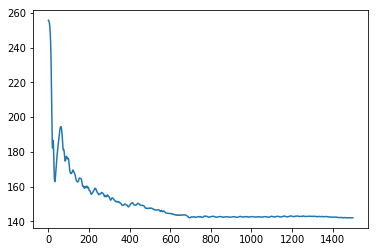

In [138]:
print("Loss at the end: {:.2f}".format(loss2[-1]))
plt.plot(range(len(loss2)), loss2)

In [90]:
model.item_factors

Embedding(12, 1)

In [139]:
a = [[k.view(1).detach().numpy()[0]] for k in[model.user_factors(torch.LongTensor([x])) for x in range(data.shape[0])]]
#np.array(a)
b = [[k.view(1).detach().numpy()[0]] for k in[model.item_factors(torch.LongTensor([x])) for x in range(data.shape[1])]]
np.array(a).shape

(9, 1)

In [140]:
np.array(a)

array([[-10.906447 ],
       [ -8.792532 ],
       [ -7.1638985],
       [ -9.088905 ],
       [ -8.98054  ],
       [ -5.6082206],
       [ -3.8895552],
       [ -7.3184032],
       [ -0.7129031]], dtype=float32)

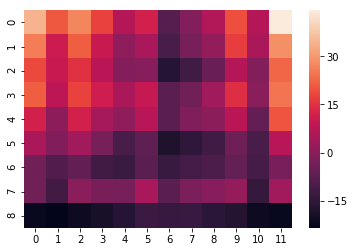

In [141]:
sns.heatmap(np.array(a)*np.array(b).T-data.detach().numpy())

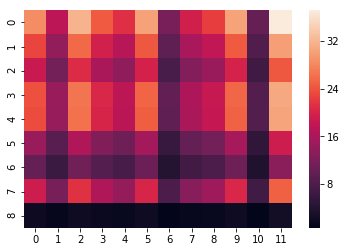

In [148]:
sns.heatmap(np.array(a)*np.array(b).T)

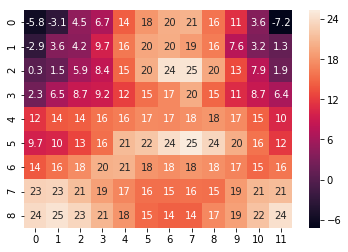

In [149]:
sns.heatmap(data.detach().numpy(),annot=True)